In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

from keras.datasets import mnist

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.preprocessing.image import ImageDataGenerator

import cv2



Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
num_classes = 10
im_rows = 32
im_cols = 32

# 데이터 읽어 들이기
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 데이터를 정규화하기
x_train = X_train[0:50000].astype('float32') / 255
x_test = X_test[0:10000].astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = to_categorical(Y_train[0:50000], num_classes)
y_test = to_categorical(Y_test[0:10000], num_classes)

# 모델 정의하기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 50% 감소
model.add(Dropout(0.25))                        # 25% 감소 

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))

# 모델 컴파일하기 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 실행하기
start = time.time()
hist = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1,
    validation_data=(x_test, y_test))
end = time.time()
print('Runtime: %0.2f 초' % (end-start))
# CPU: 약 5500 s
# GPU: 186 s , Colab GPU: 100 s, Colab,  TPU:  

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 38s 757us/step - loss: 1.4569 - acc: 0.4721 - val_loss: 1.1331 - val_acc: 0.6054
Epoch 2/10
50000/50000 [==============================] - 16s 326us/step - loss: 1.0750 - acc: 0.6225 - val_loss: 0.9470 - val_acc: 0.6679
Epoch 3/10
50000/50000 [==============================] - 17s 330us/step - loss: 0.9314 - acc: 0.6724 - val_loss: 0.8290 - val_acc: 0.7111
Epoch 4/10
50000/50000 [==============================] - 16s 329us/step - loss: 0.8386 - acc: 0.7043 - val_loss: 0.7792 - val_acc: 0.7362
Epoch 5/10
50000/50000 [==============================] - 16s 327us/step - loss: 0.7794 - acc: 0.7261 - val_loss: 0.7505 - val_acc: 0.7446
Epoch 6/10
50000/50000 [==============================] - 17s 333us/step - loss: 0.7285 - acc: 0.7428 - val_loss: 0.7414 - val_acc: 0.7443
Epoch 7/10
50000/50000 [==============================] - 16s 328us/step - loss: 0.6905 - acc: 0.7553 - val_loss: 0.

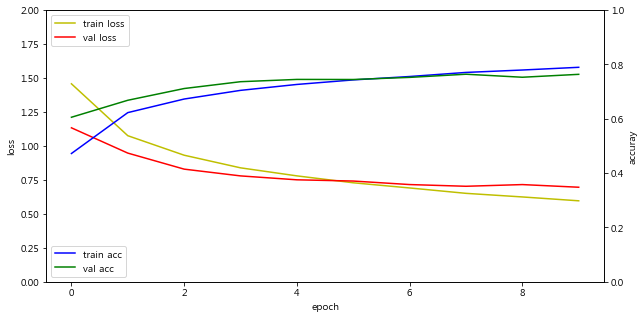

In [3]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 2.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [4]:
model.save('./cifar10_cnn.h5')

In [5]:
model = load_model('./cifar10_cnn.h5')

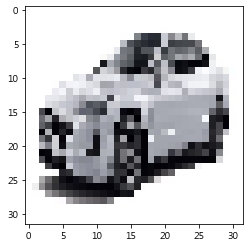

1/1 [==============================] - 0s 16ms/step
airplane = 0
automobile = 100
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 0
-------------
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
-------------
예측한 결과= automobile


In [8]:
# OpenCV를 사용해서 이미지 읽어 들이기
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

#local gpu
# im = cv2.imread('./k3.jpg')    # automobile

# gcp, 절대 경로 사용
# im = cv2.imread('./drive/My Drive/Colab Notebooks/k3.jpg')    # truck 으로 인식

# local gpu
# im = cv2.imread('./avante.jpg')   # automobile

# gcp, 절대 경로 사용
# im = cv2.imread('./drive/My Drive/Colab Notebooks/avante.jpg')     # automobile

# local gpu
# im = cv2.imread('./sonata.jpg')   # automobile

# gcp, 절대 경로 사용
# im = cv2.imread('./drive/My Drive/Colab Notebooks/sonata.jpg')     # automobile

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # OpenCV BGR --> 일반적인 RGB로 변환
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

# 예측하기
r = model.predict(np.array([im]), batch_size=1, verbose=1)
res = r[0]
# 결과 출력하기, enumerate: index 지원
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
    
print("-------------")
print(res)
print(type(res))
print("-------------")
print("예측한 결과=", labels[res.argmax()])